In [304]:
### Importing data set ####

In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeClassifier  


In [306]:
import pandas as pd 
df =pd.read_csv("D:\\GeekLurnDocument\\Proj1.csv")
df

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [307]:
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [308]:
df.info()    #checking data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [309]:
df.isnull().sum()  #checking null value

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [310]:
# duplicate rows
df.duplicated().sum()

0

In [311]:
df.drop('Sample ID', inplace=True, axis=1)           #droping a Sample ID coloumn
df

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [312]:
df.drop('Sl No', inplace=True, axis=1)           #droping a Sample ID coloumn
df

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267


In [313]:
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])
df['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, Length: 1100, dtype: int32

In [314]:
df.corr()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
Age,1.000000,0.129936,0.071300,0.033494,0.243534,0.241017,0.162094,0.167698,0.101415,0.199058,0.112364,0.109734
Gender,0.129936,1.000000,0.340494,0.180692,0.557938,0.558057,0.626347,0.636199,0.203549,0.295163,0.379249,0.382136
inter canine distance intraoral,0.071300,0.340494,1.000000,0.755648,0.564793,0.566652,0.601423,0.590075,-0.382836,-0.352744,-0.343861,-0.338299
intercanine distance casts,0.033494,0.180692,0.755648,1.000000,0.400577,0.402120,0.435529,0.357952,-0.308260,-0.297661,-0.283392,-0.279846
right canine width intraoral,0.243534,0.557938,0.564793,0.400577,1.000000,0.999832,0.941932,0.937016,0.434863,0.570471,0.506583,0.510783
right canine width casts,0.241017,0.558057,0.566652,0.402120,0.999832,1.000000,0.943088,0.938069,0.432951,0.568764,0.506022,0.510247
left canine width intraoral,0.162094,0.626347,0.601423,0.435529,0.941932,0.943088,1.000000,0.994120,0.341201,0.473677,0.540797,0.545525
left canine width casts,0.167698,0.636199,0.590075,0.357952,0.937016,0.938069,0.994120,1.000000,0.346256,0.479567,0.546163,0.551036
right canine index intra oral,0.101415,0.203549,-0.382836,-0.308260,0.434863,0.432951,0.341201,0.346256,1.000000,0.876839,0.799557,0.798836
right canine index casts,0.199058,0.295163,-0.352744,-0.297661,0.570471,0.568764,0.473677,0.479567,0.876839,1.000000,0.922306,0.921592


In [315]:
# Data visualization

<AxesSubplot:>

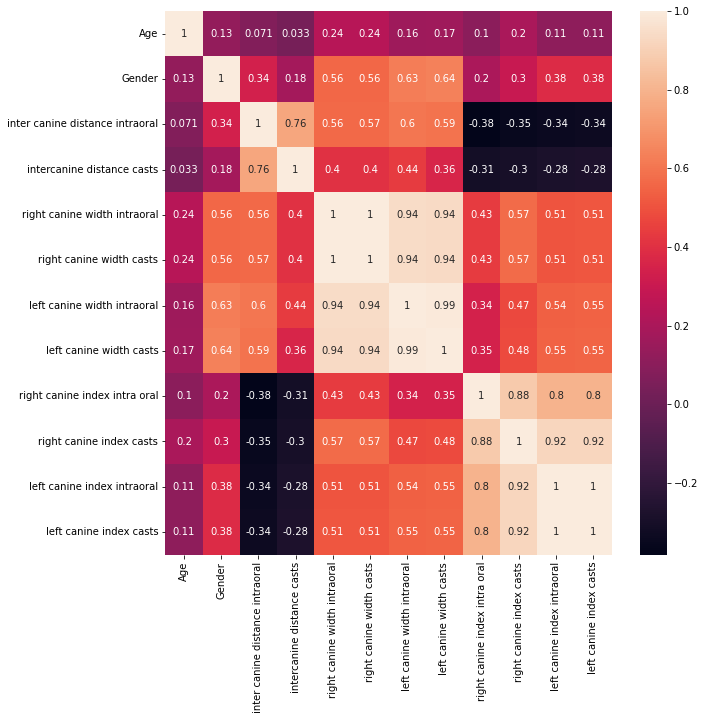

In [316]:
plt.figure(figsize=(10,10))
sns.heatmap(data= df.corr(), annot=True)   #By using heatmap we are showing correlation value.

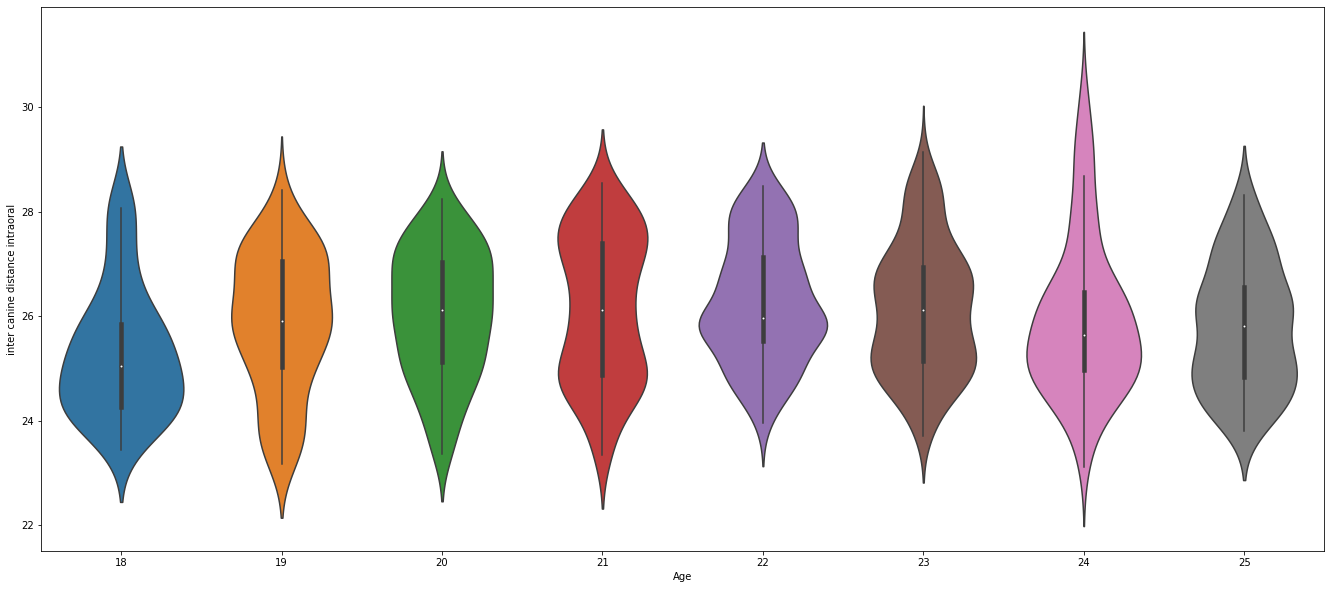

In [317]:
plt.figure(figsize=(23,10))
ax = sns.violinplot(x="Age", y="inter canine distance intraoral", data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

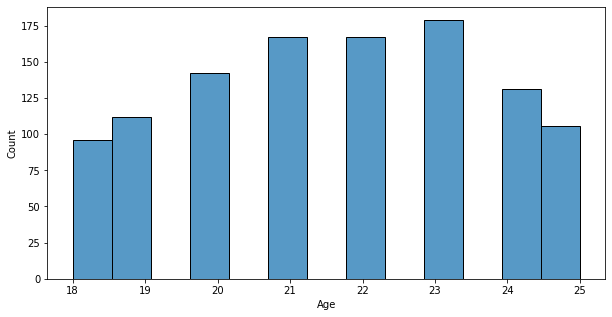

In [318]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='inter canine distance intraoral'>

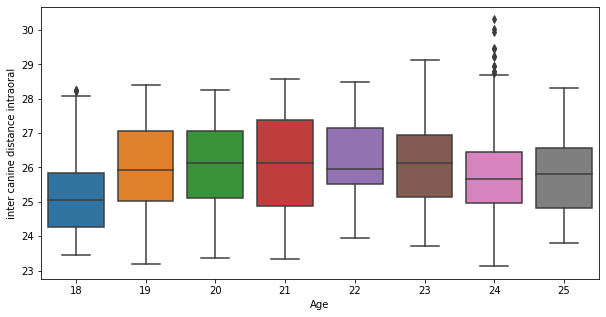

In [319]:
plt.figure(figsize=(10,5))
sns.boxplot(x =df['Age'], y =df['inter canine distance intraoral'])

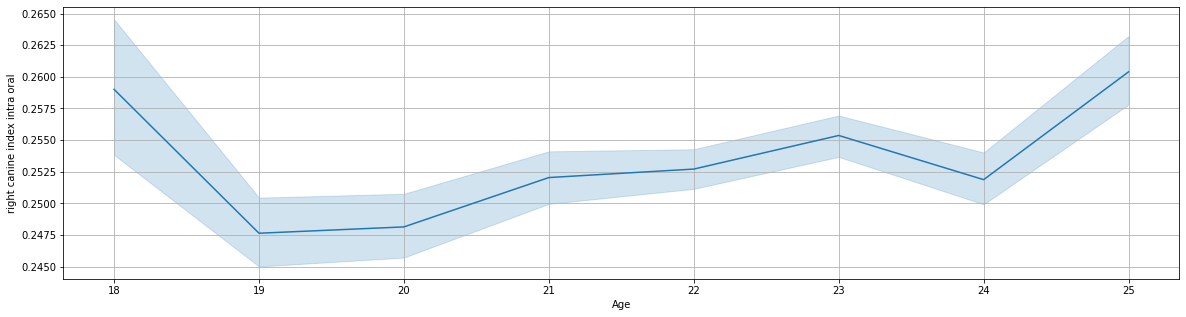

In [320]:
plt.figure(figsize=(20,5))
sns.lineplot(x=df['Age'], y=df['right canine index intra oral'])
plt.grid()

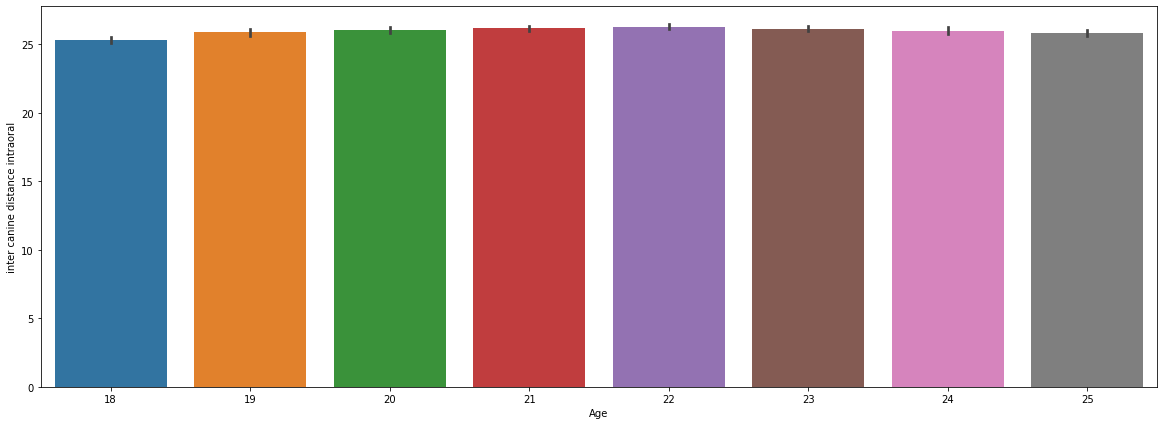

In [321]:
plt.figure(figsize=(20,7))
sns.barplot(x='Age', y='inter canine distance intraoral', data=df)
plt.show()

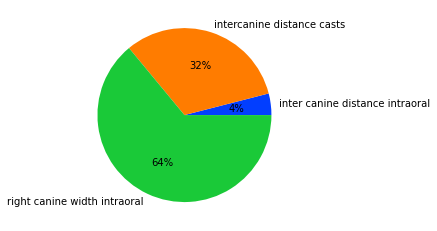

In [372]:
Model=[4,32,64]
labels=['inter canine distance intraoral','intercanine distance casts','right canine width intraoral']
colors = sns.color_palette('bright')[0:5]
plt.pie(Model,labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

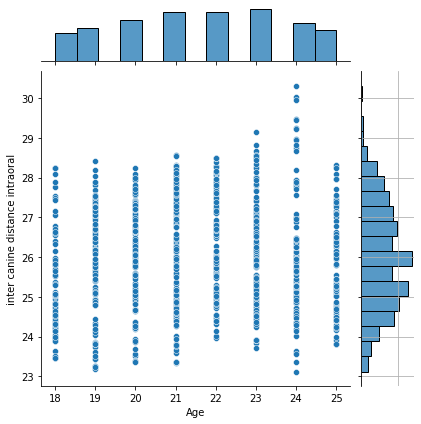

In [323]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Age', y='inter canine distance intraoral',data=df,kind='scatter')
plt.grid()


In [325]:
# working on label encoding
from sklearn.preprocessing import LabelEncoder
lb_Class = LabelEncoder()
df["Gender"]=lb_Class.fit_transform(df["Gender"])
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [326]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [327]:
df.rename(columns={'inter canine distance intraoral': 'IDI'}, inplace=True)
df.rename(columns={'intercanine distance casts': 'IDC'}, inplace=True)
df.rename(columns={'right canine width intraoral': 'RWI'}, inplace=True)
df.rename(columns={'right canine width casts': 'RWC'}, inplace=True)                      #renaming the column
df.rename(columns={'left canine width intraoral': 'IWI'}, inplace=True)
df.rename(columns={'left canine width casts': 'IWC'}, inplace=True)



In [328]:
df.head()

,Age,Gender,IDI,IDC,RWI,RWC,IWI,IWC,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [329]:
df['Gender'].value_counts()

0    550
1    550
Name: Gender, dtype: int64

In [330]:
# Identifying the inputs (X) and output (y)

y = df['Gender']

X = df[['Age', 'IDI', 'IDC', 'RWI', 'RWC', 'IWI', 'IWC', 'right canine index intra oral', 'right canine index casts','left canine index intraoral','left canine index casts']]

In [331]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [332]:
# standardization 
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS

X_scale = SS.fit_transform(X)

In [333]:
# apply normalization  --> 0 to 1 -1 to +1
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
df_MM = MM.fit_transform(df)
df_MM = pd.DataFrame(df_MM)
df_MM.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.517922,0.500000,0.399028,0.813634,0.513023,0.516117,0.514735,0.517029,0.215156,0.371577,0.407960,0.411863
std,0.297985,0.500227,0.182934,0.078348,0.176295,0.176426,0.159932,0.160467,0.109599,0.163195,0.150675,0.152764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,0.261474,0.775768,0.386047,0.392523,0.400000,0.403191,0.135714,0.240506,0.292683,0.296296
50%,0.571429,0.500000,0.386648,0.814472,0.493023,0.495327,0.510638,0.519149,0.214286,0.379747,0.390244,0.395062
75%,0.714286,1.000000,0.538595,0.860749,0.624419,0.627336,0.617021,0.621277,0.278571,0.484177,0.503049,0.506173
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [334]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,  #splitting training and test
                                                    random_state = 0)

In [335]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [336]:
# predictions
y_pred = logreg.predict(X)

In [337]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm


array([[454,  96],
       [118, 432]], dtype=int64)

In [338]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

In [339]:
ac = accuracy_score(y,y_pred)
rs = recall_score(y,y_pred)
ps = precision_score(y,y_pred)
fs = f1_score(y,y_pred)


In [340]:
print("Accuracy score: ",ac.round(2))
print("Sensitivity/Recall score: ",rs.round(2))
print("precision score: ",ps.round(2))
print("F1 score: ",fs.round(2))

Accuracy score:  0.81
Sensitivity/Recall score:  0.79
precision score:  0.82
F1 score:  0.8


In [341]:
## Ridge Regression
from sklearn.linear_model import Ridge
RR = Ridge(alpha=1000)
RR.fit(X_scale,y)
RR.coef_

from sklearn.metrics import mean_squared_error
y_pred = RR.predict(X_scale)
mse = mean_squared_error(y,y_pred)
print("Mean squared Error: ", mse.round(3))
import numpy as np
(np.sqrt(mse)).round(3)


pd.concat([pd.DataFrame(X.columns),pd.DataFrame(RR.coef_)], axis=1)

Mean squared Error:  0.156


,0,0
0,Age,0.008900
1,IDI,0.038628
2,IDC,-0.000761
3,RWI,0.034019
4,RWC,0.033896
5,IWI,0.063307
6,IWC,0.069047
7,right canine index intra oral,-0.008177
8,right canine index casts,-0.000084
9,left canine index intraoral,0.034938


In [342]:
# Lasso Regression
from sklearn.linear_model import Lasso
LS = Lasso(alpha=100)
LS.fit(X_scale,y)
LS.coef_

from sklearn.metrics import mean_squared_error
Y_pred = LS.predict(X_scale)
mse = mean_squared_error(y,y_pred)
print("Mean squared Error: ", mse.round(2))
import numpy as np
print("RMSE: " , (np.sqrt(mse)).round(2))

pd.concat([pd.DataFrame(X.columns),pd.DataFrame(LS.coef_)], axis=1)

Mean squared Error:  0.16
RMSE:  0.39


,0,0
0,Age,0.0
1,IDI,0.0
2,IDC,0.0
3,RWI,0.0
4,RWC,0.0
5,IWI,0.0
6,IWC,0.0
7,right canine index intra oral,0.0
8,right canine index casts,0.0
9,left canine index intraoral,0.0


In [343]:
##svm

In [344]:
# Loading SVC 
# Training a classifier - kernel='rbf'
from sklearn.svm import SVC
# clf = SVC(kernel='linear')
# clf = SVC(kernel='poly',degree=3)
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test  = clf.predict(X_test)

In [345]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_test)
print(cm)

print("Training Accuracy :",metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_test).round(2))

[[79 19]
 [51 71]]
Training Accuracy : 0.72
Testing Accuracy: 0.68


In [346]:
#k-nn

In [347]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5, p=2) # p=2 --> eucledian
knn.fit(X_train,y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


Training_accuracy = accuracy_score(y_train,y_pred_train)
Test_accuracy = accuracy_score(y_test,y_pred_test)

print("Training_accuracy:" , Training_accuracy.round(2))
print("Test_accuracy:" , Test_accuracy.round(2))

Training_accuracy: 0.92
Test_accuracy: 0.83


In [348]:
#XGB

In [349]:
from xgboost import XGBClassifier

In [350]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [351]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#evaluate predictions train vs test data
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.45%


In [352]:
#Random Forest

In [353]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_features=0.5,max_depth=4,n_estimators=100,bootstrap=False,random_state=24)
RFC.fit(X_train,y_train)
Y_pred_train = RFC.predict(X_train)
Y_pred_test = RFC.predict(X_test)

In [354]:
Training_score = accuracy_score(y_train,y_pred_train).round(2)
Test_score = accuracy_score(y_test,y_pred_test).round(2)

print("Training_score:",Training_score)
print("Test_score:",Test_score)


Training_score: 0.92
Test_score: 0.83


In [355]:
##Hyper paramater tunning


In [356]:
#Hyper parameter using Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
 
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.7636363636363637


In [357]:
#Hyper parameter using DecisionTreeClassifier



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
 
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
 
tree_cv.fit(X, y)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5}
Best score is 0.8027272727272727


In [358]:
#Hyper parameter using KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = KNeighborsClassifier(n_neighbors=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 1.000, test: 0.850
> 2, train: 0.956, test: 0.818
> 3, train: 0.960, test: 0.850
> 4, train: 0.920, test: 0.823
> 5, train: 0.919, test: 0.827
> 6, train: 0.895, test: 0.791
> 7, train: 0.889, test: 0.764
> 8, train: 0.873, test: 0.709
> 9, train: 0.878, test: 0.723
> 10, train: 0.856, test: 0.700
> 11, train: 0.864, test: 0.718
> 12, train: 0.849, test: 0.695
> 13, train: 0.836, test: 0.732
> 14, train: 0.823, test: 0.686
> 15, train: 0.824, test: 0.695
> 16, train: 0.816, test: 0.682
> 17, train: 0.807, test: 0.700
> 18, train: 0.801, test: 0.691
> 19, train: 0.798, test: 0.705
> 20, train: 0.793, test: 0.691


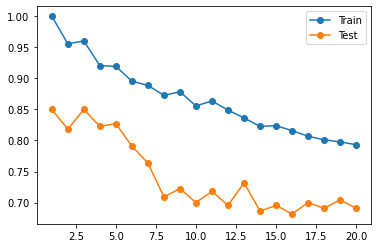

In [359]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train') #train is blue col
plt.plot(values, test_scores, '-o', label='Test')   #test is orange col
plt.legend()
plt.show()

In [360]:
#Hyper parameter using DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 0.808, test: 0.777
> 2, train: 0.815, test: 0.777
> 3, train: 0.815, test: 0.777
> 4, train: 0.852, test: 0.800
> 5, train: 0.856, test: 0.795
> 6, train: 0.890, test: 0.823
> 7, train: 0.917, test: 0.786
> 8, train: 0.949, test: 0.832
> 9, train: 0.970, test: 0.823
> 10, train: 0.984, test: 0.841
> 11, train: 0.993, test: 0.850
> 12, train: 0.999, test: 0.836
> 13, train: 0.999, test: 0.845
> 14, train: 1.000, test: 0.855
> 15, train: 1.000, test: 0.850
> 16, train: 1.000, test: 0.841
> 17, train: 1.000, test: 0.859
> 18, train: 1.000, test: 0.841
> 19, train: 1.000, test: 0.850
> 20, train: 1.000, test: 0.855


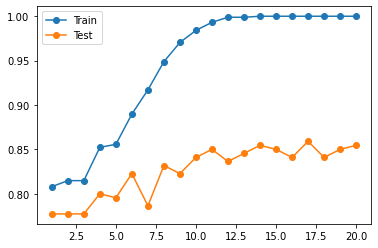

In [361]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [362]:
#Hyper parameter using Support vector machine


from sklearn.svm import SVC

In [363]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(
    estimator=SVC(), 
    param_distributions=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': array([0.92407721, 0.17616138, 0.41088676]),
                                         'kernel': ['rbf']},
                                        {'C': [1, 10, 100, 1000],
                                         'kernel': ['linear']}],
                   return_train_score=True, scoring='accuracy', verbose=1)

In [364]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.9240772064854873, 'C': 100}
SVC(C=100, gamma=0.9240772064854873)

Score on Test Data:  0.9
